# NLP Tweet Text Classification

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names=['Tweet_ID','Entity','Sentiment','Tweet_content']

df = pd.read_csv("../data/twitter_training.csv",
                    sep=',',names=column_names)

df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## EDA

In [3]:
# Dataset Overview 
df.shape

(74682, 4)

In [4]:
# Checking statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [5]:
# Checking statistical summary
display(df.describe(include='all'))

,Tweet_ID,Entity,Sentiment,Tweet_content
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,Microsoft,Negative,
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [6]:
# Check missing values
print(df.isna().sum())

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64


In [7]:
# checking duplicated values
print(df.duplicated().sum())

2700


In [8]:
# Sentiment distribution
print('Sentiments: ', df['Sentiment'].value_counts())
print(f"\nPercentages:")
print(df['Sentiment'].value_counts(normalize=True) * 100)

Sentiments:  Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Percentages:
Sentiment
Negative      30.183980
Positive      27.894272
Neutral       24.527999
Irrelevant    17.393749
Name: proportion, dtype: float64


In [9]:
# remove dupicate and missing values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
print('Missing: ', df.isna().sum())
print('duplicated: ',df.duplicated().sum())

Missing:  Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64
duplicated:  0


## Sentiment Visualization

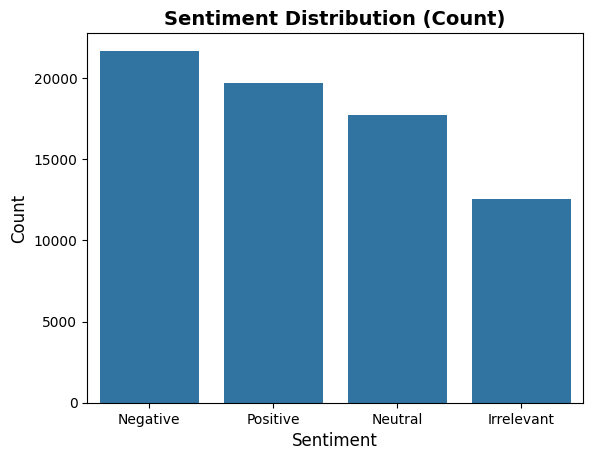

In [11]:
# Count plot
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

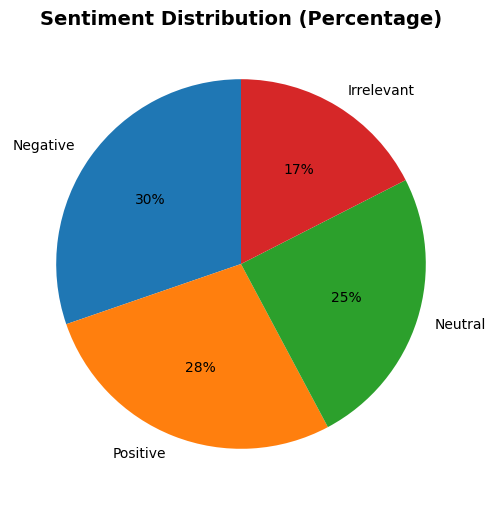

In [12]:
# Pie chart
plt.figure(figsize=(6, 6))
counts = df['Sentiment'].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%.0f%%',
    startangle=90
)
plt.title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

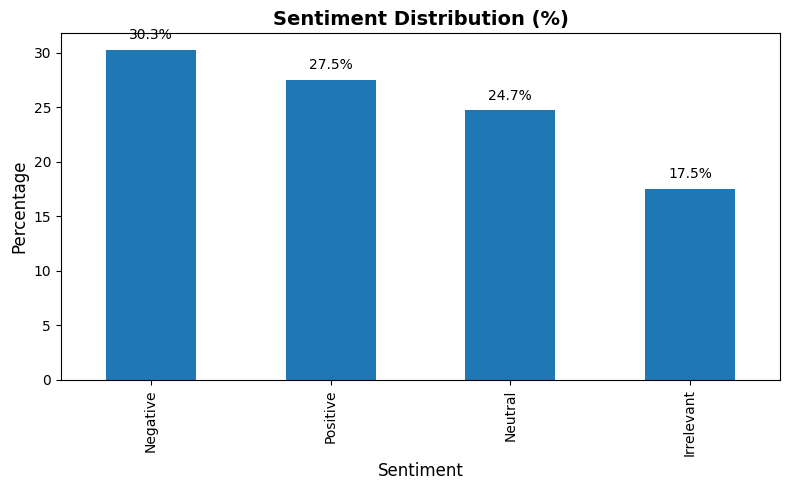

In [13]:
# Bar plot with percentages
sentiment_pct = df['Sentiment'].value_counts(normalize=True) * 100

ax = sentiment_pct.plot(kind='bar', figsize=(8, 5))
ax.set_title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Add percentage labels
for i, v in enumerate(sentiment_pct.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Text Length Analysis

In [14]:
# Calculate text lengths
df['text_length'] = df['Tweet_content'].apply(len)
df['word_count'] = df['Tweet_content'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['Tweet_content'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df.head(2)

C:\Users\sudwa\Desktop\ml_sentimenal_analysis\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3824: RuntimeWarning: Mean of empty slice
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sudwa\Desktop\ml_sentimenal_analysis\.venv\Lib\site-packages\numpy\_core\_methods.py:142: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Tweet_ID,Entity,Sentiment,Tweet_content,text_length,word_count,avg_word_length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,12,3.333333


In [15]:
# Text Length Statistics:")
print(df[['text_length', 'word_count', 'avg_word_length']].describe())

        text_length    word_count  avg_word_length
count  71656.000000  71656.000000     71484.000000
mean     110.538127     19.547965         4.952125
std       79.409848     14.438413         5.006115
min        1.000000      0.000000         1.000000
25%       49.000000      8.000000         4.074074
50%       93.000000     16.000000         4.583333
75%      155.000000     28.000000         5.250000
max      957.000000    198.000000       396.000000


## Length visualizations

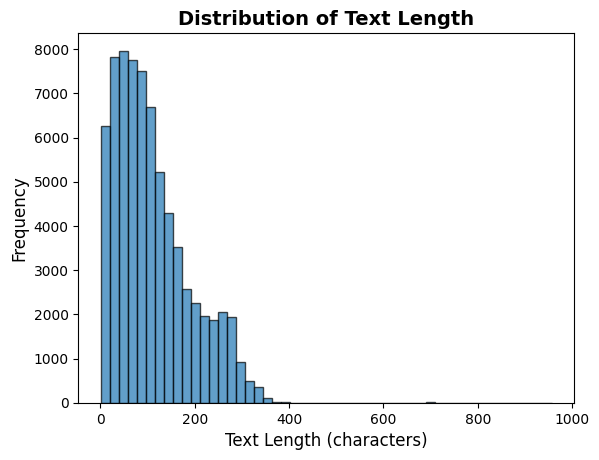

In [16]:
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Text length distribution
plt.hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

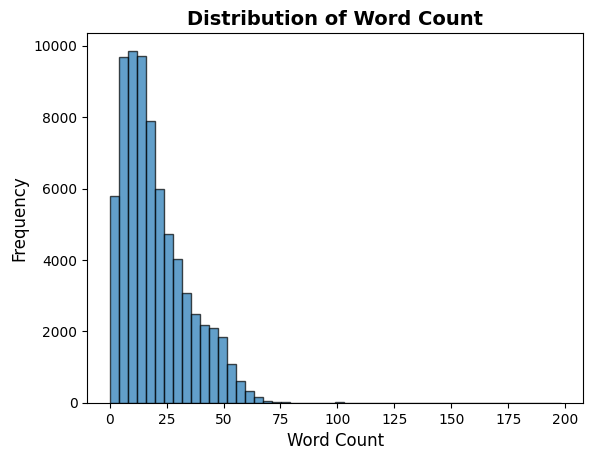

In [17]:
# Word count distribution
plt.hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Count', fontsize=14, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

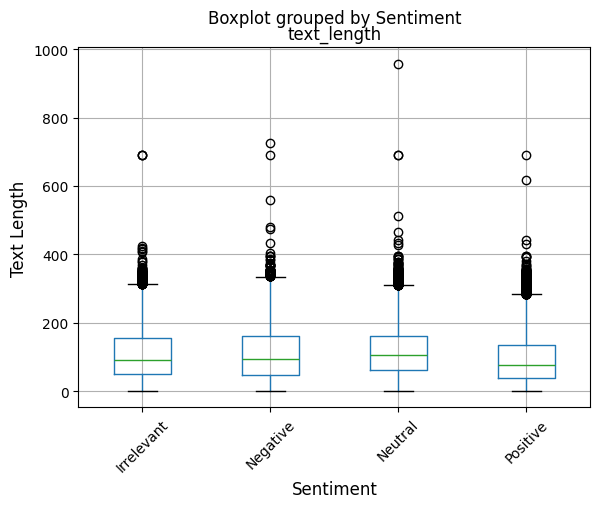

In [18]:
# Text length by sentiment
df.boxplot(column='text_length', by='Sentiment')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()

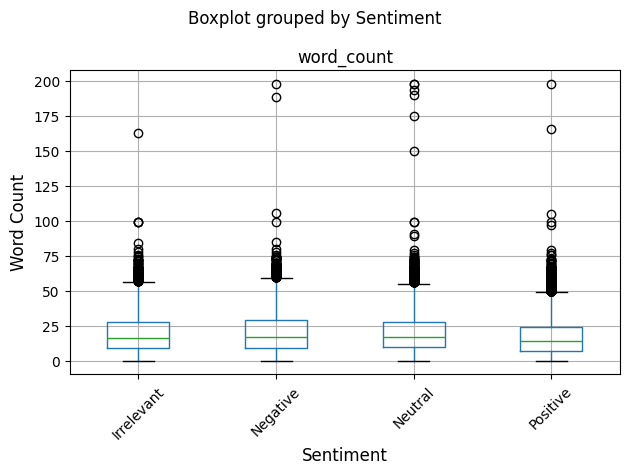

In [19]:
# Word count by sentiment
df.boxplot(column='word_count', by='Sentiment')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Statistics by sentiment
display(df.groupby('Sentiment')[['text_length', 'word_count', 'avg_word_length']].agg(['mean', 'median', 'std']))

text_length                   word_count                    \
                  mean median        std       mean median        std   
Sentiment                                                               
Irrelevant  112.074819   93.0  79.055895  19.844460   16.0  14.242987   
Negative    113.421790   94.0  81.742781  20.437506   17.0  14.920270   
Neutral     119.551841  106.0  77.279396  20.385588   17.0  14.171021   
Positive     98.289859   77.0  77.426941  17.627860   14.0  14.075526   

           avg_word_length                      
                      mean    median       std  
Sentiment                                       
Irrelevant        5.123271  4.564103  7.833416  
Negative          4.748601  4.500000  4.006655  
Neutral           5.188941  4.800000  3.078142  
Positive          4.854887  4.500000  5.076127

## Text Preprocessing

In [21]:
!uv add nltk
!uv add emoji
!uv add langdetect
!uv add wordcloud

Resolved 157 packages in 6ms
Audited 153 packages in 204ms
Resolved 157 packages in 4ms
Audited 153 packages in 64ms
Resolved 157 packages in 7ms
Audited 153 packages in 94ms
Resolved 157 packages in 4ms
Audited 153 packages in 69ms


In [22]:
import re
import string
from collections import Counter
from wordcloud import WordCloud
import emoji
from langdetect import detect, LangDetectException

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

In [23]:
# Quick data check

def inspect_tweet(text):
    return {
        "has_url": bool(re.search(r'https?://\S+|www\.\S+', text)),
        "has_mention": "@" in text,
        "has_hashtag": "#" in text,
        # "has_emoji": any(c in emoji.EMOJI_DATA for c in text),
        "has_emoticon": bool(re.search(r'[:;=][\-~]?[)D(]', text)),
        "has_repeated_chars": bool(re.search(r'(.)\1{2,}', text)),
        "has_numbers": bool(re.search(r'\d+', text)),
        "has_punctuation_emphasis": bool(re.search(r'[!?]{2,}', text))
    }

tweet = df.Tweet_content[10]
print(tweet)
inspect_tweet(tweet)

2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg


{'has_url': False,
 'has_mention': False,
 'has_hashtag': False,
 'has_emoticon': True,
 'has_repeated_chars': False,
 'has_numbers': True,
 'has_punctuation_emphasis': False}

In [24]:
# Emoji
df["has_emoji"] = df["Tweet_content"].apply(
    lambda x: any(char in emoji.EMOJI_DATA for char in x)
)

print("Emoji's: ", df["has_emoji"].value_counts())


Emoji's:  has_emoji
False    70787
True       869
Name: count, dtype: int64


In [25]:
# --- Emoticon → sentiment mapping ---
EMOTICON_MAP = {
    r":\)": " smile ",
    r":-\)": " smile ",
    r":D": " laugh ",
    r";\)": " wink ",
    r":\(": " sad ",
    r":-\(": " sad ",
    r":'\(": " cry "
}

def preprocess_tweet(text, keep_hashtags=True, normalize_repeats=True, max_repeat=2):
    meta = {}

    raw_text = text  # preserve for language detection

    # ---------- URLs ----------
    meta["has_url"] = bool(re.search(r'https?://\S+|www\.\S+', text))
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)

    # ---------- Mentions ----------
    meta["has_mention"] = bool(re.search(r'@\w+', text))
    text = re.sub(r'@\w+', ' user ', text)

    # ---------- Hashtags ----------
    meta["has_hashtag"] = bool(re.search(r'#\w+', text))
    if keep_hashtags:
        text = re.sub(
            r'#(\w+)',
            lambda m: ' '.join(re.findall(r'[A-Z]?[a-z]+', m.group(1))) or m.group(1),
            text
        )
    else:
        text = re.sub(r'#\w+', ' ', text)

    # ---------- Emoticons ----------
    meta["has_emoticon"] = False
    for pattern, replacement in EMOTICON_MAP.items():
        if re.search(pattern, text):
            meta["has_emoticon"] = True
            text = re.sub(pattern, replacement, text)

    # ---------- Emojis ----------
    meta["has_emoji"] = bool(emoji.emoji_list(text))
    text = emoji.demojize(text, delimiters=(" ", " "))

    # ---------- Numbers ----------
    meta["has_numbers"] = bool(re.search(r'\d+', text))
    text = re.sub(r'\d+(\.\d+)?', ' number ', text)

    # ---------- Repeated characters ----------
    meta["has_repeated_chars"] = bool(re.search(r'(.)\1{2,}', text))
    if normalize_repeats:
        text = re.sub(r'(.)\1{2,}', r'\1' * max_repeat, text)

    # ---------- Punctuation emphasis ----------
    meta["exclamation_count"] = text.count("!")
    meta["question_count"] = text.count("?")

    # ---------- Cleanup ----------
    text = text.lower()
    text = re.sub(r'[-–—]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # ---------- Tokenization (NO stopword removal) ----------
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    clean_text = ' '.join(tokens)

    # ---------- Language detection (raw text) ----------
    try:
        lang = detect(raw_text)
    except LangDetectException:
        lang = "unknown"

    meta["language"] = lang
    meta["is_english"] = lang == "en"

    return clean_text, meta


In [26]:
# test on smaller
# df = df.sample(n=1_000, random_state=42) 

# Apply to dataframe
processed_texts = []
metas = []

for tweet in df['Tweet_content']:
    clean_text, meta = preprocess_tweet(tweet)
    processed_texts.append(clean_text)
    metas.append(meta)

df['processed_text'] = processed_texts
df['meta'] = metas



In [27]:
df.head()


,Tweet_ID,Entity,Sentiment,Tweet_content,text_length,word_count,avg_word_length,has_emoji,processed_text,meta
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091,False,im getting on borderland and i will murder you...,"{'has_url': False, 'has_mention': False, 'has_..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,12,3.333333,False,i am coming to the border and i will kill you all,"{'has_url': False, 'has_mention': False, 'has_..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000,False,im getting on borderland and i will kill you all,"{'has_url': False, 'has_mention': False, 'has_..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,10,4.200000,False,im coming on borderland and i will murder you all,"{'has_url': False, 'has_mention': False, 'has_..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333,False,im getting on borderland number and i will mur...,"{'has_url': False, 'has_mention': False, 'has_..."


In [28]:
print(f"Original: {df['Tweet_content'].iloc[2]}")
print(f"Cleaned:  {df['processed_text'].iloc[2]}")

Original: im getting on borderlands and i will kill you all,
Cleaned:  im getting on borderland and i will kill you all


## Word Frequency Analysis

In [29]:
def get_word_freq(texts, top_n=20):
    """Get word frequency"""
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Overall word frequency
all_word_freq = get_word_freq(df['processed_text'])

print(f"\nTop 20 Most Common Words:")
for word, freq in all_word_freq:
    print(f"{word:15s}: {freq:4d}")


Top 20 Most Common Words:
number         : 57755
the            : 43949
i              : 28780
to             : 28512
a              : 27968
and            : 26326
of             : 19222
it             : 18733
user           : 18039
is             : 17494
for            : 15433
in             : 15315
this           : 14347
you            : 12021
on             : 11904
my             : 11645
game           : 10754
that           : 10120
with           : 8752
so             : 7626


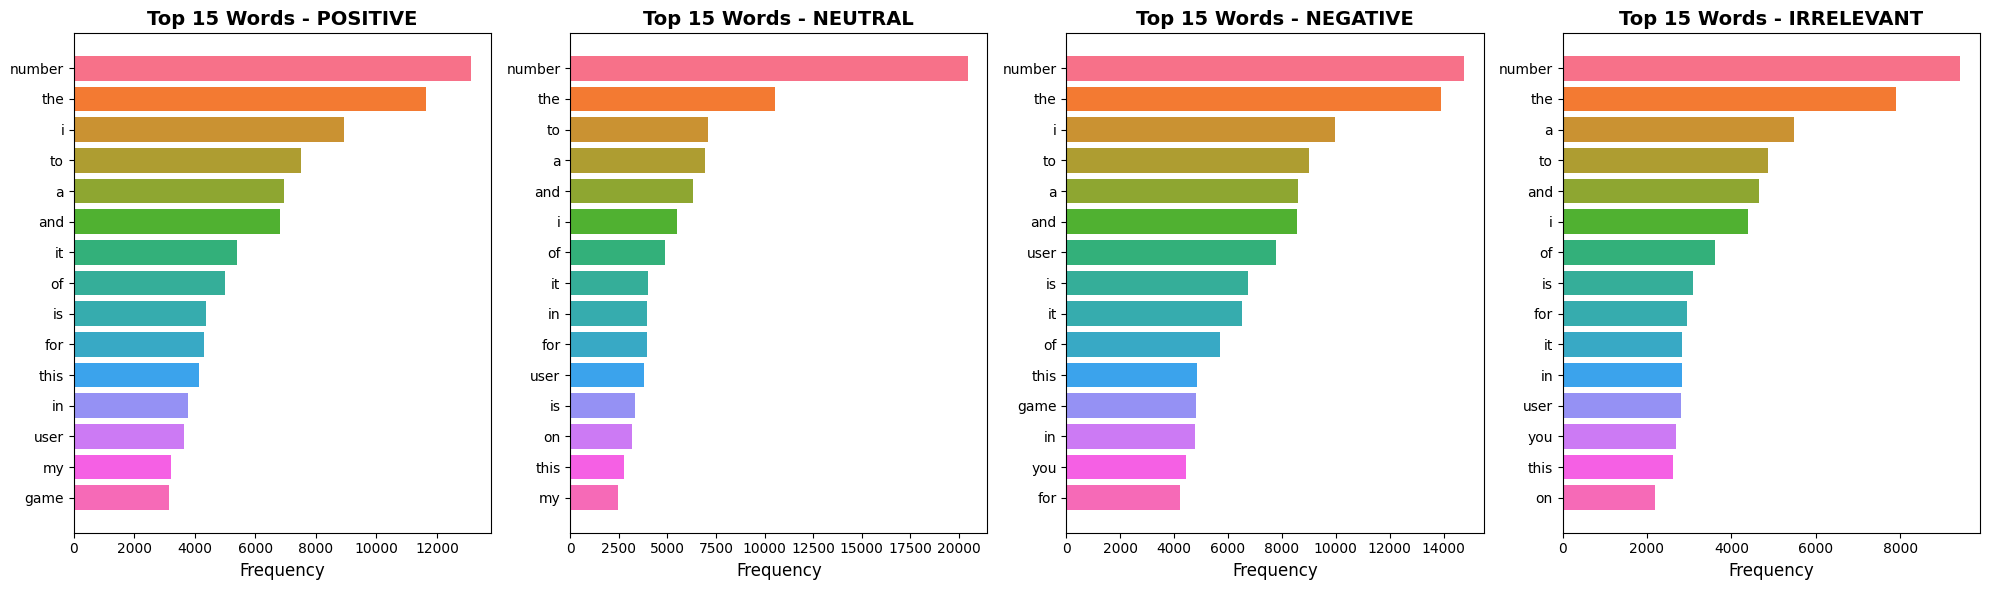

In [30]:
# Word frequency by sentiment
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

sentiments = df['Sentiment'].unique()
for i, sentiment in enumerate(sentiments):
    sentiment_texts = df[df['Sentiment'] == sentiment]['processed_text']
    word_freq = get_word_freq(sentiment_texts, top_n=15)
    
    words, counts = zip(*word_freq)
    axes[i].barh(words, counts, color=sns.color_palette("husl", len(words)))
    axes[i].set_title(f'Top 15 Words - {sentiment.upper()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Frequency', fontsize=12)
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

## Word Clouds

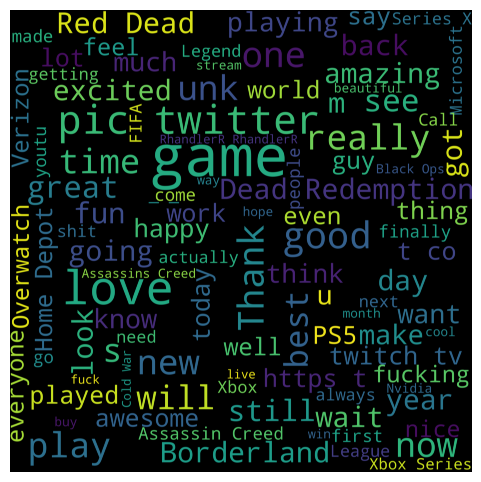

In [31]:
from wordcloud import WordCloud
word_cloud_text = ''.join(df[df["Sentiment"]=="Positive"].Tweet_content)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

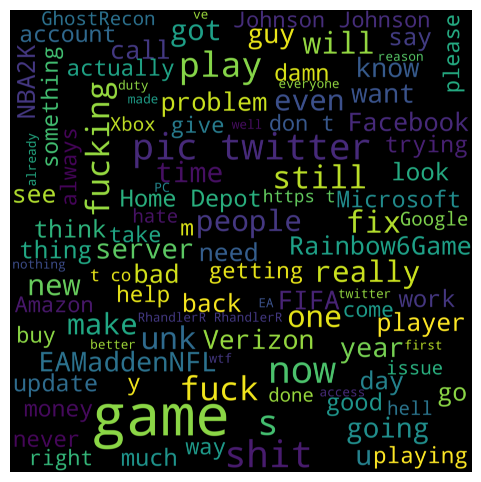

In [32]:
word_cloud_text_negative = ''.join(df[df["Sentiment"]=="Negative"].Tweet_content)
wordcloud_negative = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text_negative)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

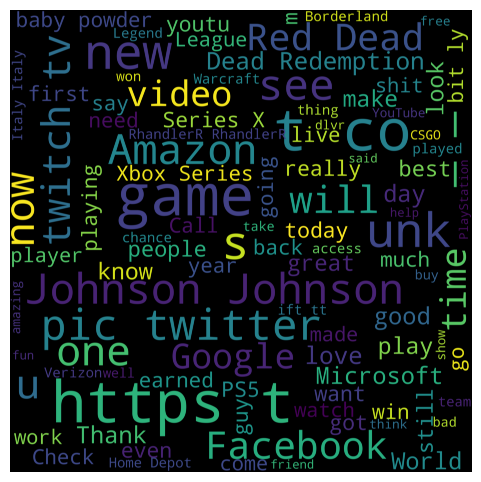

In [33]:
word_cloud_text = ''.join(df[df["Sentiment"]=="Neutral"].Tweet_content)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## N-gram Analysis

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(texts, n=2, top_n=15):
    """Extract n-grams"""
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=top_n)
    ngrams = vectorizer.fit_transform(texts)
    counts = ngrams.sum(axis=0).A1
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), counts))
    return sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)

In [35]:
# Bigrams
bigrams = get_ngrams(df['processed_text'], n=2, top_n=15)

print("\nTop 15 Bigrams:")
for bigram, freq in bigrams:
    print(f"{bigram:30s}: {freq:4d}")

# Trigrams
trigrams = get_ngrams(df['processed_text'], n=3, top_n=15)

print("\nTop 15 Trigrams:")
for trigram, freq in trigrams:
    print(f"{trigram:40s}: {freq:4d}")


Top 15 Bigrams:
number number                 : 7482
user user                     : 4046
of the                        : 2819
in the                        : 2792
this is                       : 1993
the game                      : 1834
for the                       : 1823
on the                        : 1536
red dead                      : 1419
to the                        : 1402
to be                         : 1350
the best                      : 1326
number and                    : 1259
the number                    : 1241
johnson johnson               : 1156

Top 15 Trigrams:
user user user                          : 1831
number number number                    : 1779
red dead redemption                     : 1016
call of duty                            :  796
italy italy italy                       :  761
dead redemption number                  :  720
league of legend                        :  618
do not have                             :  530
have access to                    

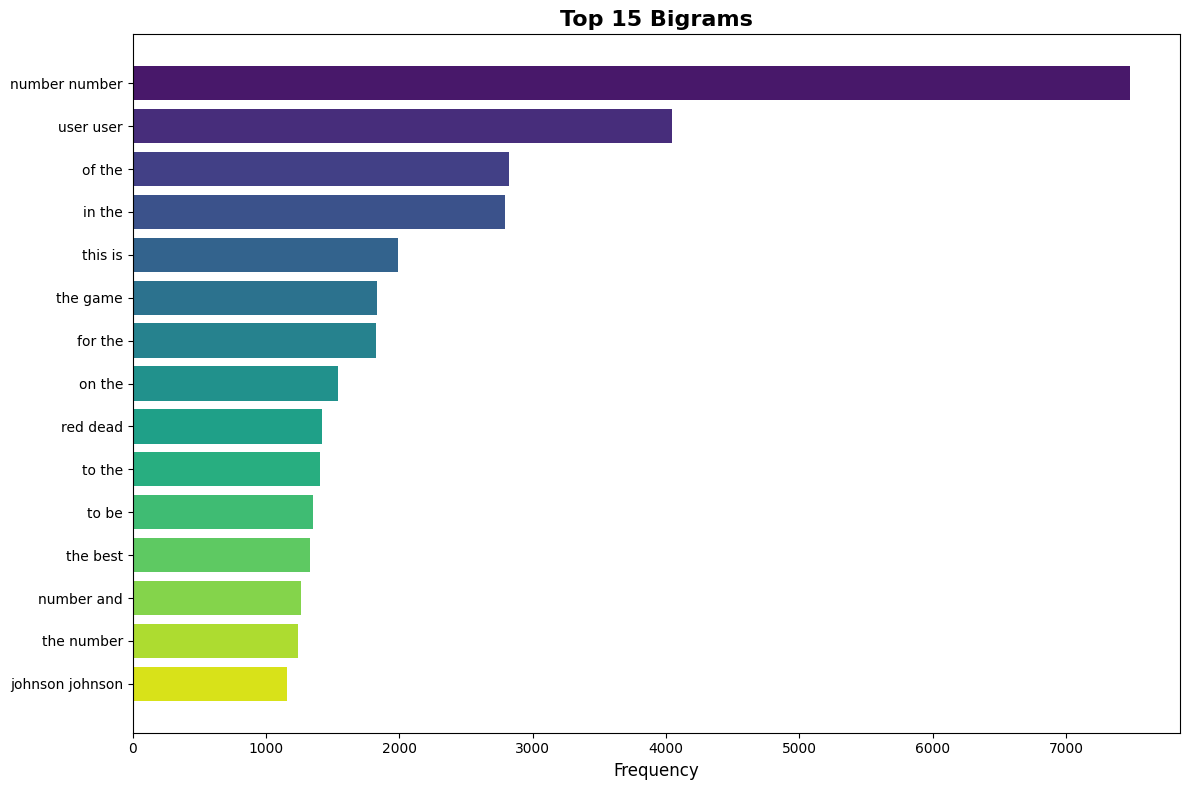

In [36]:
# Visualize bigrams
fig, ax = plt.subplots(figsize=(12, 8))
bigram_words, bigram_counts = zip(*bigrams)
ax.barh(bigram_words, bigram_counts, color=sns.color_palette("viridis", len(bigram_words)))
ax.set_title('Top 15 Bigrams', fontsize=16, fontweight='bold')
ax.set_xlabel('Frequency', fontsize=12)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Feature Engineering

In [37]:
# Additional features
df['has_url'] = df['Tweet_content'].str.contains(r'http|www', case=False).astype(int)
df['has_mention'] = df['Tweet_content'].str.contains(r'@\w+', case=False).astype(int)
df['has_hashtag'] = df['Tweet_content'].str.contains(r'#\w+', case=False).astype(int)
df['exclamation_count'] = df['Tweet_content'].str.count('!')
df['question_count'] = df['Tweet_content'].str.count('\?')
df['uppercase_ratio'] = df['Tweet_content'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

print("\n Feature Statistics:")
feature_cols = ['has_url', 'has_mention', 'has_hashtag', 'exclamation_count', 
                'question_count', 'uppercase_ratio']
display(df[feature_cols].describe())

<>:6: SyntaxWarning: invalid escape sequence '\?'
<>:6: SyntaxWarning: invalid escape sequence '\?'
C:\Users\sudwa\AppData\Local\Temp\ipykernel_964\1634134525.py:6: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['Tweet_content'].str.count('\?')



 Feature Statistics:


,has_url,has_mention,has_hashtag,exclamation_count,question_count,uppercase_ratio
count,71656.000000,71656.000000,71656.0,71656.000000,71656.000000,71656.000000
mean,0.035587,0.160028,0.0,0.401069,0.183209,0.080231
std,0.185259,0.366635,0.0,3.468174,2.191320,0.115199
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.027778
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.050847
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.088803
max,1.000000,1.000000,0.0,184.000000,198.000000,1.000000


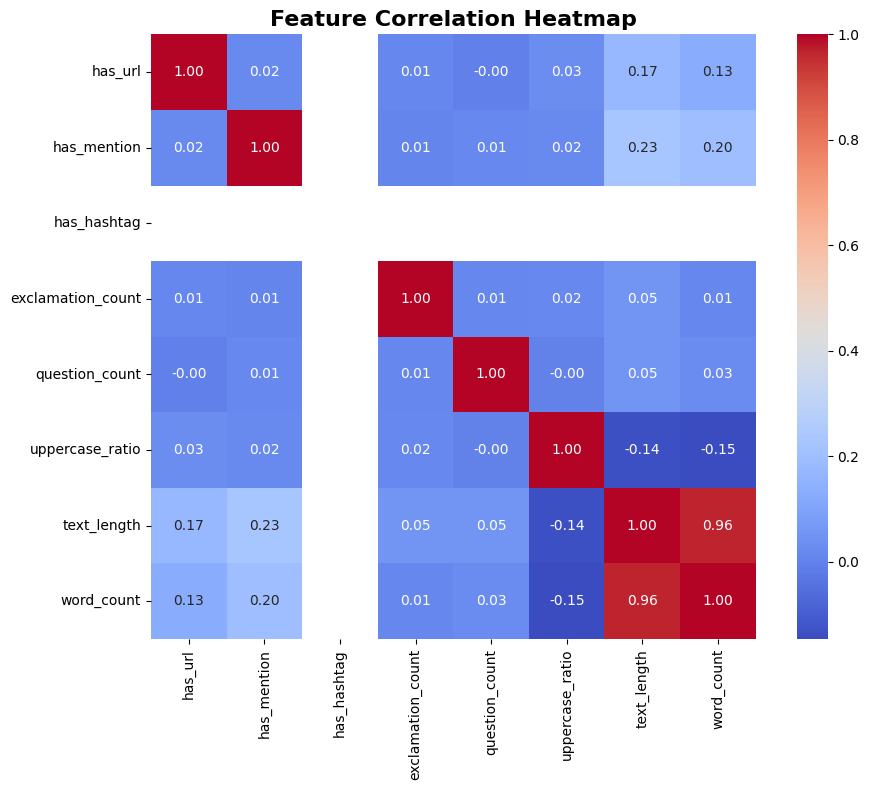

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_cols + ['text_length', 'word_count']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [39]:
df.to_csv("clean_data.csv", index=False)

## Prepare Data

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [41]:
# Encode labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label:10s} -> {encoded}")

Irrelevant -> 0
Negative   -> 1
Neutral    -> 2
Positive   -> 3


In [42]:
df.columns

Index(['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_content', 'text_length',
       'word_count', 'avg_word_length', 'has_emoji', 'processed_text', 'meta',
       'has_url', 'has_mention', 'has_hashtag', 'exclamation_count',
       'question_count', 'uppercase_ratio', 'sentiment_encoded'],
      dtype='object')

In [43]:
# Train-test split
X = df['processed_text']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 57324 samples
Test set: 14332 samples


In [44]:
# Vectorization - TF-IDF
print("Vectorizing text with TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF shape: {X_train_tfidf.shape}")

Vectorizing text with TF-IDF...
TF-IDF shape: (57324, 5000)


In [45]:
# Vectorization - Count Vectorizer
print("Vectorizing text with Count Vectorizer...")
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print(f"Count Vectorizer shape: {X_train_count.shape}")

Vectorizing text with Count Vectorizer...
Count Vectorizer shape: (57324, 5000)


## Modeling

In [46]:
# !uv add svm
#!uv add tensorflow


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score)
import time
import joblib
import tracemalloc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
# 1. Logistic model
lr_model = LogisticRegression(max_iter=1000, random_state=42, C=1.0)
lr_model.fit(X_train_tfidf, y_train)
# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)
# Metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

In [49]:
print(classification_report(y_test, y_pred_lr, 
                               target_names=label_encoder.classes_))

              precision    recall  f1-score   support

  Irrelevant       0.66      0.49      0.56      2507
    Negative       0.70      0.78      0.74      4340
     Neutral       0.65      0.61      0.63      3542
    Positive       0.66      0.72      0.69      3943

    accuracy                           0.67     14332
   macro avg       0.67      0.65      0.65     14332
weighted avg       0.67      0.67      0.67     14332



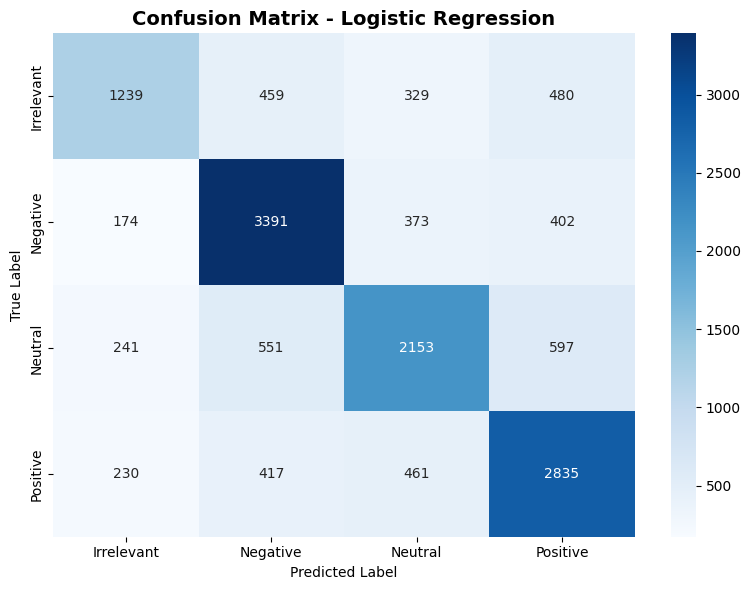

In [50]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [51]:
# 2. Multinomial model
model_nb = MultinomialNB()
model_nb.fit(X_train_count, y_train)
# Predictions
y_pred_nb = model_nb.predict(X_test_count)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      2507
           1       0.62      0.72      0.67      4340
           2       0.60      0.49      0.54      3542
           3       0.60      0.67      0.63      3943

    accuracy                           0.60     14332
   macro avg       0.59      0.58      0.58     14332
weighted avg       0.59      0.60      0.59     14332



In [52]:
# 3. RandomForest model
# model_rf = RandomForestClassifier()
# model_rf.fit(X_train_tfidf, y_train)
# Predictions
# y_pred_rf = model_rf.predict(X_test_tfidf)
# print(classification_report(y_test,y_pred_rf))

In [53]:
# 4. Extra Trees model
# model_extra = ExtraTreesClassifier()
# model_extra.fit(X_train_tfidf, y_train)
# Predictions
# y_pred_extra = model_extra.predict(X_test_tfidf)
# print(classification_report(y_test,y_pred_extra))

In [54]:
# 5. Multi-Models
MODELS = {
    "LinearSVM": LinearSVC(
        class_weight="balanced"
    ),
    "SGDClassifier": SGDClassifier(
        loss="hinge",
        max_iter=1000,
        tol=1e-3,
        class_weight="balanced"
    ),
    "RidgeClassifier": RidgeClassifier(
        class_weight="balanced"
    )
}
results = []

for name, model in MODELS.items():
    print(name)

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "model": name,
        "accuracy": report["accuracy"],
        "f1_macro": report["macro avg"]["f1-score"],
        "f1_weighted": report["weighted avg"]["f1-score"]
    })
results_df = (
    pd.DataFrame(results)
      .sort_values(by="f1_macro", ascending=False)
      .reset_index(drop=True)
)
print(results_df)

LinearSVM
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      2507
           1       0.74      0.75      0.75      4340
           2       0.66      0.62      0.64      3542
           3       0.69      0.70      0.70      3943

    accuracy                           0.68     14332
   macro avg       0.67      0.67      0.67     14332
weighted avg       0.68      0.68      0.68     14332

SGDClassifier
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      2507
           1       0.68      0.76      0.72      4340
           2       0.61      0.57      0.59      3542
           3       0.66      0.67      0.66      3943

    accuracy                           0.64     14332
   macro avg       0.63      0.63      0.63     14332
weighted avg       0.64      0.64      0.64     14332

RidgeClassifier
              precision    recall  f1-score   support

           0       0.56      0.66  

## GridSearch tuning

In [56]:
# Grid-Model
def train_best_tweet_sentiment_model(
    X_train, y_train, X_test, y_test, model_save_path="best_tweet_model.pkl"
):

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_enc = label_encoder.fit_transform(y_train)
    y_test_enc = label_encoder.transform(y_test)

    # Base pipeline
    base_pipeline = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english", sublinear_tf=True)),
        ("clf", None)
    ])

    # Grid search
    grids = {
        "LogisticRegression": {
            "clf": [LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)],
            "tfidf__ngram_range": [(1,1), (1,2)],
            "tfidf__max_features": [15000, 30000],
            "clf__C": [0.1, 1, 5]
        },
        "LinearSVM": {
            "clf": [LinearSVC(class_weight="balanced")],
            "tfidf__ngram_range": [(1,1), (1,2)],
            "tfidf__max_features": [15000, 30000],
            "clf__C": [0.1, 1, 5]
        },
        "SGDClassifier": {
            "clf": [SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3, class_weight="balanced")],
            "tfidf__ngram_range": [(1,1), (1,2)],
            "tfidf__max_features": [15000, 30000],
            "clf__alpha": [1e-4, 1e-3, 1e-2]
        },
        "RidgeClassifier": {
            "clf": [RidgeClassifier(class_weight="balanced")],
            "tfidf__ngram_range": [(1,1), (1,2)],
            "tfidf__max_features": [15000, 30000],
            "clf__alpha": [0.5, 1.0, 2.0]
        }
    }

    best_score = -1
    best_grid = None
    best_name = None

    # Run GridSearchCV classifier
    for name, param_grid in grids.items():
        print(f"\nRunning GridSearchCV for {name}...")
        tracemalloc.start()
        start_time = time.time()

        grid = GridSearchCV(
            estimator=base_pipeline,
            param_grid=param_grid,
            scoring="f1_macro",
            cv=5,
            n_jobs=-1,
            verbose=2
        )
        grid.fit(X_train, y_train_enc)

        end_time = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        print(f"{name} - Best F1-macro: {grid.best_score_:.4f}")
        print(f"Best params: {grid.best_params_}")
        print(f"CV time: {end_time - start_time:.2f}s | Memory: {peak/1024/1024:.2f} MB")

        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_grid = grid
            best_name = name

    # Evaluate on test set
    print(f"\n===== BEST MODEL: {best_name} =====")
    y_pred = best_grid.best_estimator_.predict(X_test)
    print(classification_report(y_test_enc, y_pred))

    # Save pipeline + label encoder
    artifact = {
        "pipeline": best_grid.best_estimator_,
        "label_encoder": label_encoder
    }
    # joblib.dump(artifact, model_save_path)
    print(f"\nSaved best pipeline + label encoder to '{model_save_path}'")

    return best_name, best_grid, artifact


# grid try
best_name, best_grid, artifact = train_best_tweet_sentiment_model(
    X_train, y_train, X_test, y_test, model_save_path="tweet_sentiment_model.pkl"
)

print('name: ', best_name, )
print('classifier: ', best_grid)
print('artifact: ', artifact)


Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\sudwa\Desktop\ml_sentimenal_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression - Best F1-macro: 0.8157
Best params: {'clf': LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1), 'clf__C': 5, 'tfidf__max_features': 30000, 'tfidf__ngram_range': (1, 2)}
CV time: 667.44s | Memory: 75.57 MB

Running GridSearchCV for LinearSVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
LinearSVM - Best F1-macro: 0.8324
Best params: {'clf': LinearSVC(class_weight='balanced'), 'clf__C': 5, 'tfidf__max_features': 30000, 'tfidf__ngram_range': (1, 2)}
CV time: 469.37s | Memory: 75.46 MB

Running GridSearchCV for SGDClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SGDClassifier - Best F1-macro: 0.7188
Best params: {'clf': SGDClassifier(class_weight='balanced'), 'clf__alpha': 0.0001, 'tfidf__max_features': 30000, 'tfidf__ngram_range': (1, 2)}
CV time: 155.11s | Memory: 75.46 MB

Running GridSearchCV for RidgeClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
RidgeClassifier - Best F1-mac

## Tensorflow Keras

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
# vectorizer
vectorizer = TextVectorization(
    max_tokens=20_000,
    output_sequence_length=100,
    standardize="lower_and_strip_punctuation"
)

vectorizer.adapt(X_train.to_numpy())


num_classes = y.nunique()

keras_model = models.Sequential([
    vectorizer,
    Embedding(input_dim=20_000, output_dim=128),
    GlobalAveragePooling1D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax"),
])


keras_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

keras_model.fit(
    X_train.to_numpy(),
    y_train.to_numpy(),
    validation_split=0.1,
    epochs=5,
    batch_size=32,
    callbacks=[early_stop],
)

# keras_model.fit(
#     X_train.to_numpy(),
#     y_train.to_numpy(),
#     epochs=5,
#     batch_size=32,
#     verbose=1,
# )
y_pred_keras = np.argmax(
    keras_model.predict(X_test.to_numpy(), verbose=0),
    axis=1,
)

keras_f1 = f1_score(
    y_test.to_numpy(),
    y_pred_keras,
    average="macro"
)

print(f"\n🤖 Keras F1-macro: {keras_f1:.4f}")




Epoch 1/5
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 165s 94ms/step - accuracy: 0.4234 - loss: 1.2455 - val_accuracy: 0.5495 - val_loss: 1.0588
Epoch 2/5
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 220s 105ms/step - accuracy: 0.6268 - loss: 0.9313 - val_accuracy: 0.6463 - val_loss: 0.8910
Epoch 3/5
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 162s 101ms/step - accuracy: 0.7075 - loss: 0.7574 - val_accuracy: 0.7389 - val_loss: 0.6970
Epoch 4/5
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 148s 92ms/step - accuracy: 0.7496 - loss: 0.6560 - val_accuracy: 0.7103 - val_loss: 0.7332
Epoch 5/5
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 148s 92ms/step - accuracy: 0.7797 - loss: 0.5787 - val_accuracy: 0.7696 - val_loss: 0.6082

🤖 Keras F1-macro: 0.7414


In [64]:
import joblib

# Sklearn model
y_pred_sklearn = best_grid.best_estimator_.predict(X_test)
sklearn_f1 = f1_score(y_test, y_pred_sklearn, average="macro")

# Keras model
y_pred_keras = np.argmax(keras_model.predict(X_test.to_numpy(), verbose=0), axis=1)
keras_f1 = f1_score(y_test.to_numpy(), y_pred_keras, average="macro")

print(f"Sklearn F1-macro: {sklearn_f1:.4f}")
print(f"Keras F1-macro: {keras_f1:.4f}")

# Compare and save the best
if sklearn_f1 >= keras_f1:
    # Save sklearn artifact
    artifact = {
        "pipeline": best_grid.best_estimator_,
        "label_encoder": label_encoder,
        "model_name": best_name,
        "f1_score": sklearn_f1
    }
    model_save_path = "best_model_sklearn.pkl"
    print(f"\nBest model: {best_name} (scikit-learn)")

else:
    # Save Keras artifact
    artifact = {
        "vectorizer": vectorizer,
        "label_encoder": label_encoder,
        "keras_model": keras_model,
        "model_name": "KerasNN",
        "f1_score": keras_f1
    }
    model_save_path = "best_model_keras.pkl"
    print("\nBest model: KerasNN")

# artifact
joblib.dump(artifact, model_save_path)
print(f"Saved best model to '{model_save_path}'")


Sklearn F1-macro: 0.8508
Keras F1-macro: 0.7414

Best model: LinearSVM (scikit-learn)
Saved best model to 'best_model_sklearn.pkl'


## Inference

In [79]:
model_path = "best_model_sklearn.pkl"
artifact = joblib.load(model_path)

In [84]:
test_data = df.processed_text[400]# iloc[40]
X=[test_data]
X

['a extremely amazing that a this is number it been out preparing for some month please we please tell u about the ascension base bluff station door number it really been a year']

In [89]:
if artifact["model_name"] == "KerasNN":
    # Keras model
    keras_model = artifact["keras_model"]
    vectorizer = artifact["vectorizer"]
    # vectorize text
    X_vec = vectorizer(np.array(X)).numpy()
    y_pred = np.argmax(keras_model.predict(X_vec, verbose=0), axis=1)

else:
    # Scikit-learn model
    pipeline = artifact["pipeline"]
    y_pred = pipeline.predict(X)

print(y_pred)
predictions = y_pred

[3]


In [91]:
if "label_encoder" in artifact:
    labels = artifact["label_encoder"].inverse_transform(predictions)
    print(labels[0])


Positive


In [108]:
df.iloc[300]

Tweet_ID                                                          2453
Entity                                                     Borderlands
Sentiment                                                     Positive
Tweet_content        The April patch + mini DLC for Borderlands 3 i...
text_length                                                         56
word_count                                                          11
avg_word_length                                               4.181818
has_emoji                                                        False
processed_text       the april patch mini dlc for borderland number...
meta                 {'has_url': False, 'has_mention': False, 'has_...
has_url                                                              0
has_mention                                                          0
has_hashtag                                                          0
exclamation_count                                                    0
questi

In [107]:
t_data = df.iloc[300].Tweet_content
t_data

'The April patch + mini DLC for Borderlands 3 is amazing.'

In [103]:
t_data = df.Tweet_content[300]# iloc[40]
t_data

'I disagree. Psycho Krieg and the Fantastic Fustercluck is a wonderful end to the borderlands 3 dlc line that focuses on a fan favorite character and gives long lasting players closure on some very big questions of Krieg’s character and memorable set pieces players interact with.'

In [99]:
clean_text, meta = preprocess_tweet(t_data)
clean_text

'a extremely amazing that a this is number it been out preparing for some month please we please tell u about the ascension base bluff station door number it really been a year'

In [100]:
X=[clean_text]
X

['a extremely amazing that a this is number it been out preparing for some month please we please tell u about the ascension base bluff station door number it really been a year']

In [101]:
if artifact["model_name"] == "KerasNN":
    # Keras model
    keras_model = artifact["keras_model"]
    vectorizer = artifact["vectorizer"]
    # vectorize text
    X_vec = vectorizer(np.array(X)).numpy()
    y_pred = np.argmax(keras_model.predict(X_vec, verbose=0), axis=1)

else:
    # Scikit-learn model
    pipeline = artifact["pipeline"]
    y_pred = pipeline.predict(X)

print(y_pred)
predictions = y_pred

if "label_encoder" in artifact:
    labels = artifact["label_encoder"].inverse_transform(predictions)
    print(labels[0])


[3]
Positive
